In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Final= pd.read_csv('/Users/elva/Downloads/ComercioExteriorF.csv', delimiter=';')

In [3]:
Final.head()

,GESTION,MES,Departamento,NANDINA,des_nandina,des_Pais,des_Medio_Sal,des_Via_Sal,CUCIR3,GCE,CIIU3,CODACT,TNT,Peso_Bruto_Kg,Peso_Neto_Kg,Valor_FOB_Sus
0,2018,1,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,84412,78471,446435
1,2018,2,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,48058,44831,263136
2,2018,3,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,87845,81769,478434
3,2018,5,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,62414,58332,332144
4,2018,6,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,85491,79750,465085


In [4]:
Final['Cod_des_nandina'], _ = pd.factorize(Final['des_nandina'])
Final['Cod_des_Pais'], _ = pd.factorize(Final['des_Pais'])
Final['Cod_des_Medio_Sal'], _ = pd.factorize(Final['des_Medio_Sal'])
Final['Cod_des_Via_Sal'], _ = pd.factorize(Final['des_Via_Sal'])

In [5]:
Final.head()

,GESTION,MES,Departamento,NANDINA,des_nandina,des_Pais,des_Medio_Sal,des_Via_Sal,CUCIR3,GCE,CIIU3,CODACT,TNT,Peso_Bruto_Kg,Peso_Neto_Kg,Valor_FOB_Sus,Cod_des_nandina,Cod_des_Pais,Cod_des_Medio_Sal,Cod_des_Via_Sal
0,2018,1,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,84412,78471,446435,0,0,0,0
1,2018,2,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,48058,44831,263136,0,0,0,0
2,2018,3,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,87845,81769,478434,0,0,0,0
3,2018,5,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,62414,58332,332144,0,0,0,0
4,2018,6,7.0,201300000,CARNE DESHUESADA DE ANIMALES DE LA ESPECIE BOV...,PERU,CARRETERA,DESAGUADERO,111,122,1511,D63,34,85491,79750,465085,0,0,0,0


MODELOS DE MACHINE LEARNING

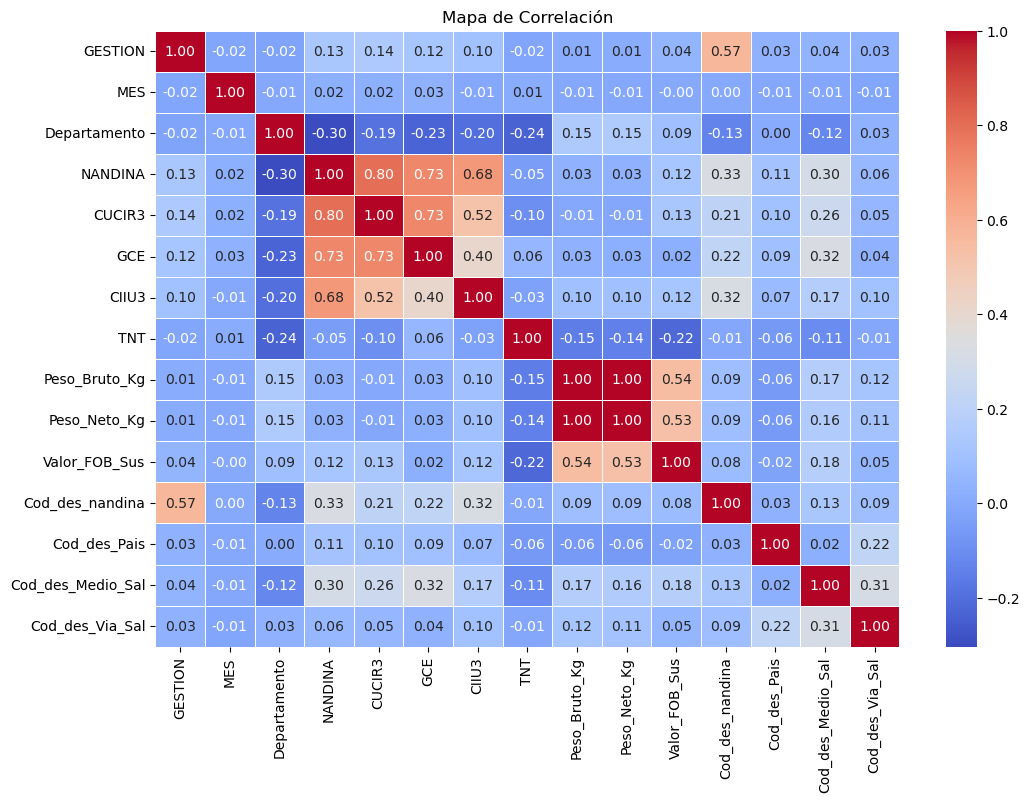

In [7]:
numeric_columns = Final.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlación')
plt.show()

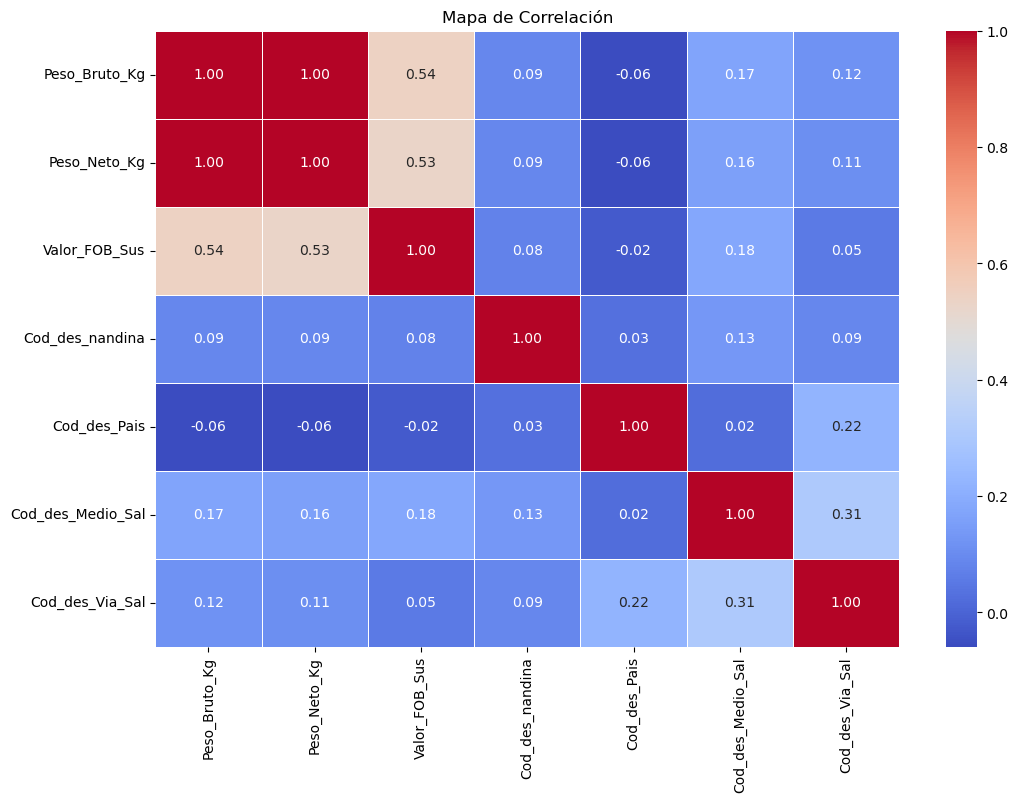

In [8]:
exclude_columns = ['GESTION', 'MES','Departamento', 'NANDINA', 'GCE', 'TNT', 'CUCIR3', 'CIIU3']
numeric_columns = Final.drop(exclude_columns, axis=1).select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlación')
plt.show()

Error cuadrático medio (MSE): 23881.67255499304
Coeficiente de determinación (R²): 0.021306716101051726
Root Mean Squared Error (RMSE): 154.53696177611698


/Users/elva/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


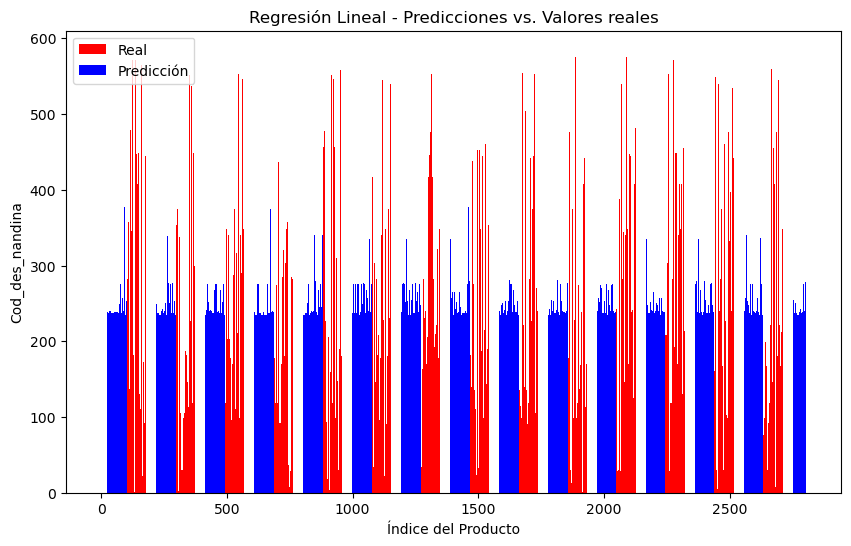

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# MODELO DE REGRESIÓN LINEAL CON EVALUACIÓN DE ERROR
X = Final[['Cod_des_Pais', 'Cod_des_Medio_Sal', 'Cod_des_Via_Sal']]
y = Final['Cod_des_nandina']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R²):', r2)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)
X_test_subset = X_test.head(14000)
y_test_subset = y_test.head(14000)
predictions_subset = model.predict(X_test_subset)

indices = np.arange(len(predictions_subset))
plt.figure(figsize=(10, 6))
plt.bar(indices - 0.2, y_test_subset, width=0.4, color='r', align='center', label='Real')
plt.bar(indices + 0.2, predictions_subset, width=0.4, color='b', align='center', label='Predicción')

plt.xlabel('Índice del Producto')
plt.ylabel('Cod_des_nandina')
plt.title('Regresión Lineal - Predicciones vs. Valores reales')
plt.legend()
plt.show()

Error cuadrático medio (MSE): 22403.754911654905
Coeficiente de determinación (R²): 0.08187316379687626
Root Mean Squared Error (RMSE): 149.67883922470438
Predicciones del modelo:
[287.86353011 211.72657247 214.63731386 ... 201.8592818  314.36865949
 238.60421422]


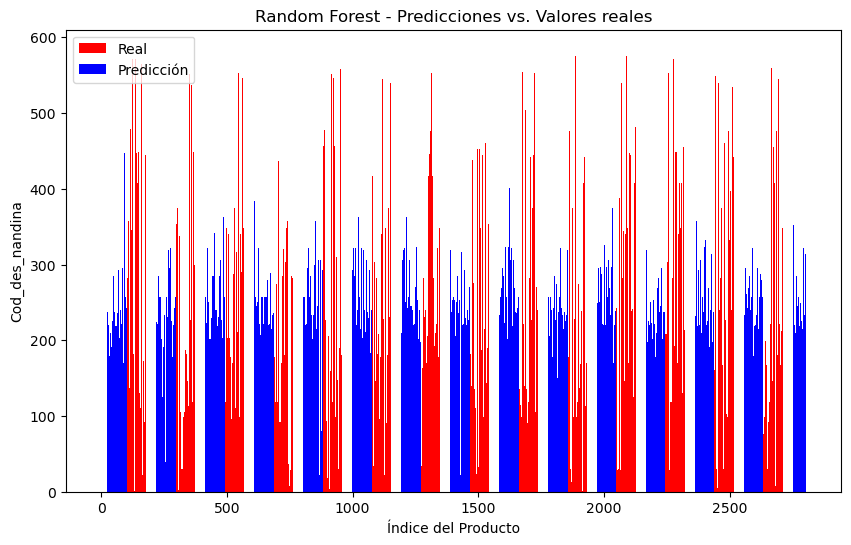

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# MODELO DE RANDOM FOREST CON EVALUACIÓN DE ERROR
X = Final[['Cod_des_Pais', 'Cod_des_Medio_Sal', 'Cod_des_Via_Sal']]
y = Final['Cod_des_nandina']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R²):', r2)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

X_test_subset = X_test.head(14000)
y_test_subset = y_test.head(14000)
predictions_subset = model.predict(X_test_subset)
print("Predicciones del modelo:")
print(predictions_subset)

indices = np.arange(len(predictions_subset))
plt.figure(figsize=(10, 6))
plt.bar(indices - 0.2, y_test_subset, width=0.4, color='r', align='center', label='Real')
plt.bar(indices + 0.2, predictions_subset, width=0.4, color='b', align='center', label='Predicción')

plt.xlabel('Índice del Producto')
plt.ylabel('Cod_des_nandina')
plt.title('Random Forest - Predicciones vs. Valores reales')
plt.legend()
plt.show()

Error cuadrático medio (MSE): 23456.952006158193
Coeficiente de determinación (R²): 0.038712161541330725
Root Mean Squared Error (RMSE): 153.15662573378336


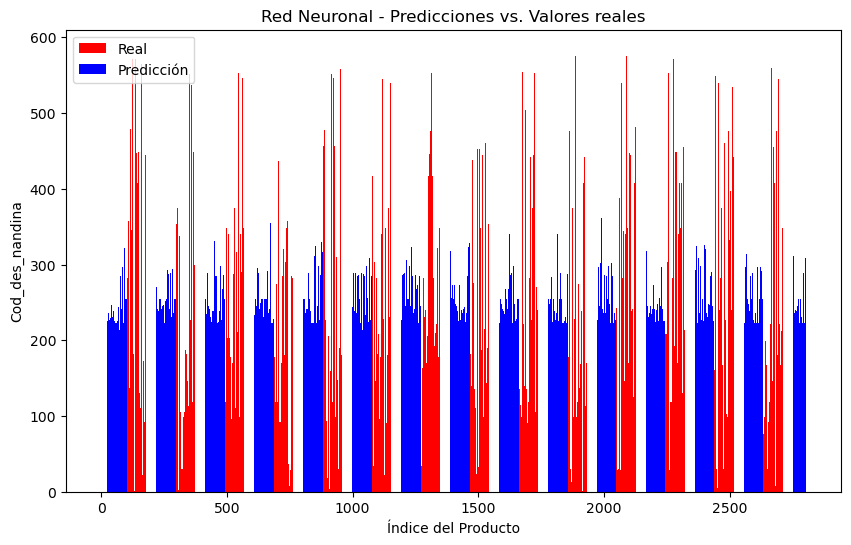

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# MODELO DE RED NEURONAL CON EVALUACIÓN DE ERROR
X = Final[['Cod_des_Pais', 'Cod_des_Medio_Sal', 'Cod_des_Via_Sal']]
y = Final['Cod_des_nandina']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R²):', r2)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

X_test_subset = X_test.head(14000)
y_test_subset = y_test.head(14000)
predictions_subset = model.predict(X_test_subset)

indices = np.arange(len(predictions_subset))
plt.figure(figsize=(10, 6))
plt.bar(indices - 0.2, y_test_subset, width=0.4, color='r', align='center', label='Real')
plt.bar(indices + 0.2, predictions_subset, width=0.4, color='b', align='center', label='Predicción')

plt.xlabel('Índice del Producto')
plt.ylabel('Cod_des_nandina')
plt.title('Red Neuronal - Predicciones vs. Valores reales')
plt.legend()
plt.show()

Error Cuadrático Medio (MSE): 23928.060352931876
Coeficiente de Determinación (R²): 0.013306598855214014


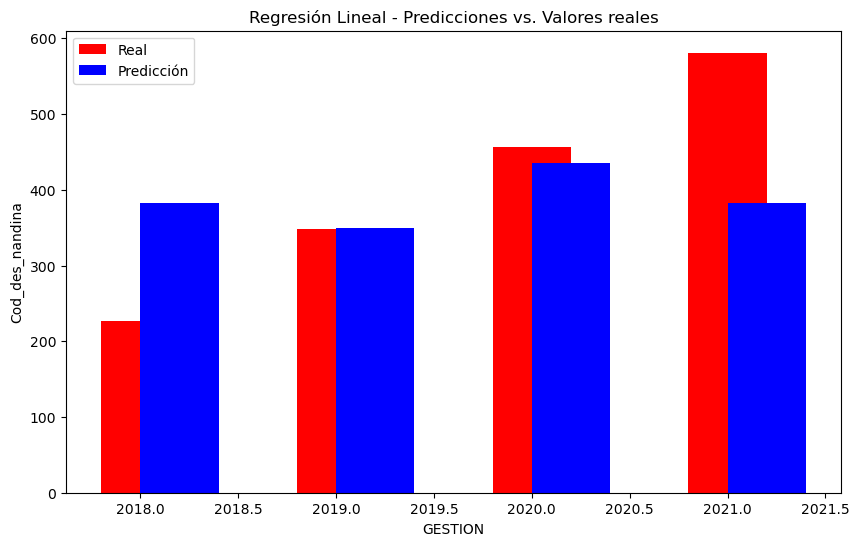

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = Final[['Cod_des_Pais', 'Cod_des_Medio_Sal', 'Cod_des_Via_Sal']]
y = Final['Cod_des_nandina']
años = Final['GESTION']

X_train, X_test, y_train, y_test, años_train, años_test = train_test_split(X, y, años, test_size=0.2, random_state=50)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

X_test_subset = X_test.head(14018)
y_test_subset = y_test.head(14018)
predictions_subset = model.predict(X_test_subset)

mse = mean_squared_error(y_test_subset, predictions_subset)
r2 = r2_score(y_test_subset, predictions_subset)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

indices = np.arange(len(predictions_subset))
años_subset = años_test.head(14018)

plt.figure(figsize=(10, 6))
plt.bar(años_subset, y_test_subset, width=0.4, color='r', align='center', label='Real')
plt.bar(años_subset, predictions_subset, width=0.4, color='b', align='edge', label='Predicción')

plt.xlabel('GESTION')
plt.ylabel('Cod_des_nandina')
plt.title('Regresión Lineal - Predicciones vs. Valores reales')
plt.legend()
plt.show()

Error Cuadrático Medio (MSE): 21988.268018460036
Coeficiente de Determinación (R²): 0.09329554354124192


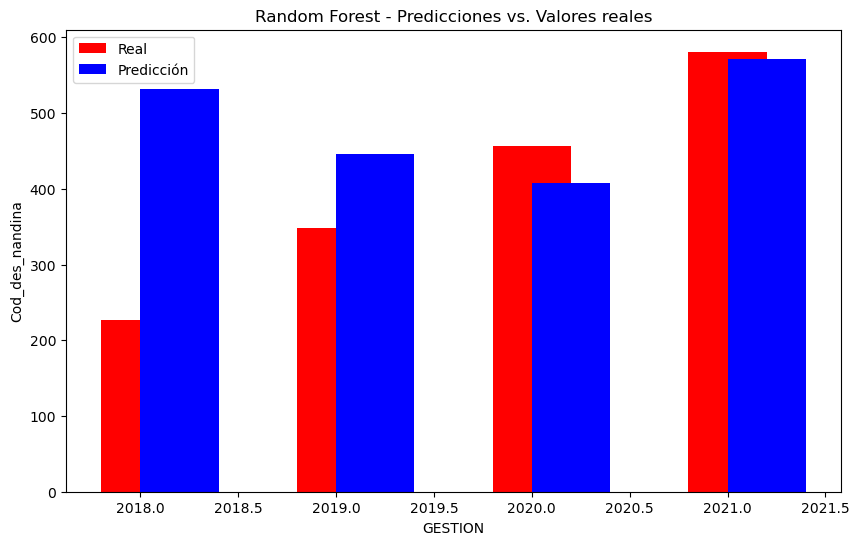

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

X = Final[['Cod_des_Pais', 'Cod_des_Medio_Sal', 'Cod_des_Via_Sal']]
y = Final['Cod_des_nandina']
años = Final['GESTION']

X_train, X_test, y_train, y_test, años_train, años_test = train_test_split(X, y, años, test_size=0.2, random_state=50)

model = RandomForestRegressor(n_estimators=100, random_state=50)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

X_test_subset = X_test.head(14018)
y_test_subset = y_test.head(14018)
predictions_subset = model.predict(X_test_subset)

mse = mean_squared_error(y_test_subset, predictions_subset)
r2 = r2_score(y_test_subset, predictions_subset)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

indices = np.arange(len(predictions_subset))
años_subset = años_test.head(14018)

plt.figure(figsize=(10, 6))
plt.bar(años_subset, y_test_subset, width=0.4, color='r', align='center', label='Real')
plt.bar(años_subset, predictions_subset, width=0.4, color='b', align='edge', label='Predicción')

plt.xlabel('GESTION')
plt.ylabel('Cod_des_nandina')
plt.title('Random Forest - Predicciones vs. Valores reales')
plt.legend()
plt.show()

2024-02-04 21:13:45.669080: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
351/351 [==============================] - 3s 4ms/step - loss: 66206.9766 - val_loss: 52718.8242
Epoch 2/10
351/351 [==============================] - 1s 3ms/step - loss: 48534.1562 - val_loss: 48124.1719
Epoch 3/10
351/351 [==============================] - 1s 2ms/step - loss: 44407.2383 - val_loss: 44500.7461
Epoch 4/10
351/351 [==============================] - 1s 3ms/step - loss: 41215.8984 - val_loss: 41309.9258
Epoch 5/10
351/351 [==============================] - 1s 3ms/step - loss: 38153.2695 - val_loss: 37985.7148
Epoch 6/10
351/351 [==============================] - 1s 3ms/step - loss: 34810.0273 - val_loss: 34457.2148
Epoch 7/10
351/351 [==============================] - 1s 2ms/step - loss: 31436.7246 - val_loss: 30679.1875
Epoch 8/10
351/351 [==============================] - 1s 2ms/step - loss: 28533.0742 - val_loss: 27895.8438
Epoch 9/10
351/351 [==============================] - 1s 3ms/step - loss: 26483.8984 - val_loss: 26025.0332
Epoch 10/10
88/88 [=========

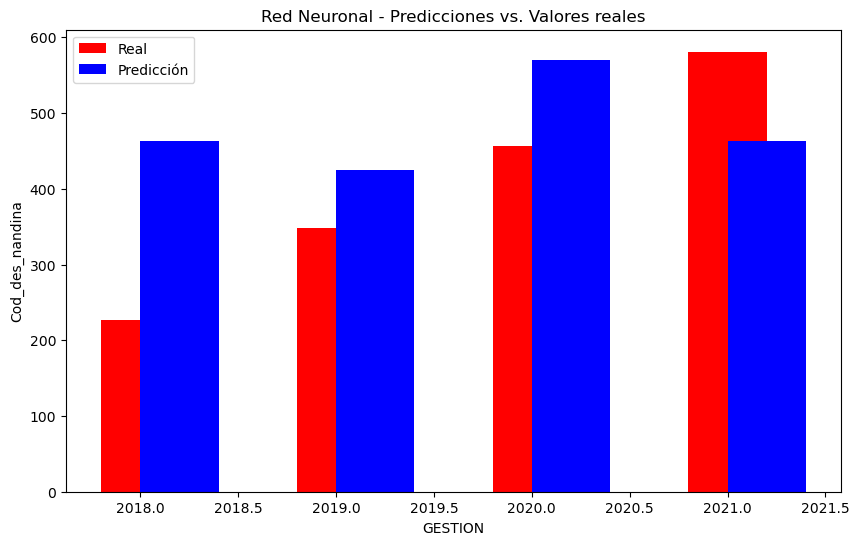

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X = Final[['Cod_des_Pais', 'Cod_des_Medio_Sal', 'Cod_des_Via_Sal']]
y = Final['Cod_des_nandina']
años = Final['GESTION']

X_train, X_test, y_train, y_test, años_train, años_test = train_test_split(X, y, años, test_size=0.2, random_state=50)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
predictions = model.predict(X_test)

indices = np.arange(len(predictions))
años_subset = años_test.head(14018)

mse = mean_squared_error(y_test_subset, predictions_subset)
r2 = r2_score(y_test_subset, predictions_subset)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

plt.figure(figsize=(10, 6))
plt.bar(años_subset, y_test, width=0.4, color='r', align='center', label='Real')
plt.bar(años_subset, predictions.flatten(), width=0.4, color='b', align='edge', label='Predicción')

plt.xlabel('GESTION')
plt.ylabel('Cod_des_nandina')
plt.title('Red Neuronal - Predicciones vs. Valores reales')
plt.legend()
plt.show()

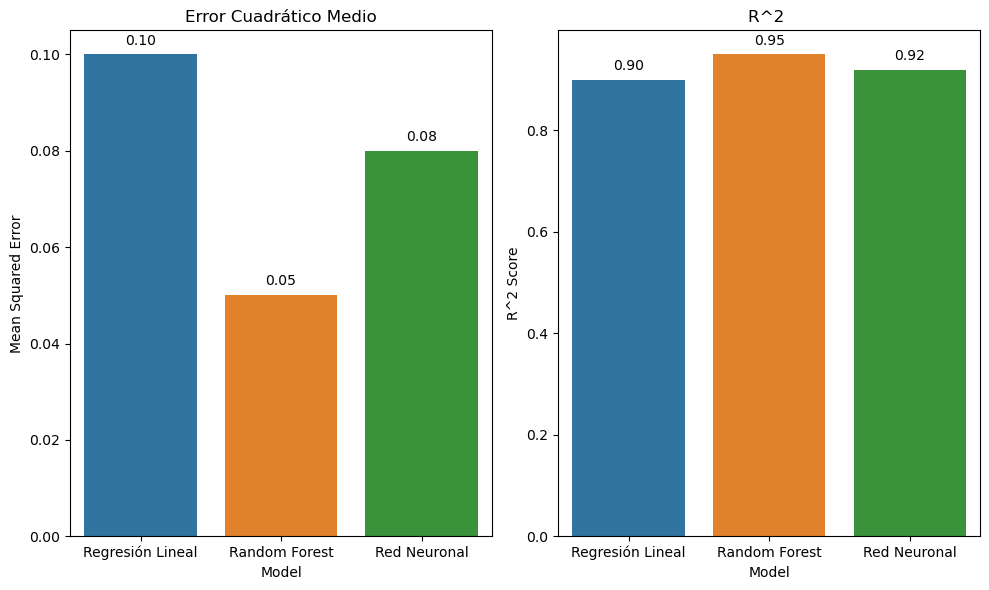

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

models_metrics = [
    {'Model': 'Regresión Lineal', 'Mean Squared Error': 0.1, 'R^2 Score': 0.9},
    {'Model': 'Random Forest', 'Mean Squared Error': 0.05, 'R^2 Score': 0.95},
    {'Model': 'Red Neuronal', 'Mean Squared Error': 0.08, 'R^2 Score': 0.92},
]
metrics = pd.DataFrame(models_metrics)
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Model', y='Mean Squared Error', data=metrics)
plt.title('Error Cuadrático Medio')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Model', y='R^2 Score', data=metrics)
plt.title('R^2 ')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# resultados de las metricas
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_nn = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1)
])
model_nn.compile(optimizer='adam', loss='mean_squared_error')
model_nn.fit(X_scaled, y_train, epochs=50, batch_size=32, verbose=0)
predictions_nn = model_nn.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, predictions_nn)
r2_nn = r2_score(y_test, predictions_nn)

print("Regresión Lineal - MSE:", mse_lr, " R²:", r2_lr)
print("Random Forest - MSE:", mse_rf, " R²:", r2_rf)
print("Red Neuronal - MSE:", mse_nn, " R²:", r2_nn)

best_model = min([("Regresión Lineal", mse_lr), ("Random Forest", mse_rf), ("Red Neuronal", mse_nn)], key=lambda x: x[1])
print("El mejor modelo es:", best_model[0])

88/88 [==============================] - 0s 3ms/step
Regresión Lineal - MSE: 23928.060352931876  R²: 0.013306598855214014
Random Forest - MSE: 21997.609199720147  R²: 0.09291035218965271
Red Neuronal - MSE: 23451.770231851693  R²: 0.0329468167654251
El mejor modelo es: Random Forest
